
### This script contains the following points;
### 1. Importing Data and Libraries
### 2. Sample Data
### 3. Visualisations
    3.1 Sales By Hours (Histogram)
    3.2 Expenditure by Hours of the Day (Line Chart)
    3.3 Orders by Customer Loyalty Categories (Bar Chart)
    3.4 Links Between Age and Family Status and Dependants (Line Chart)
    3.5 Link Between Age and Spending Power (Scatterplot)


### 4. Exporting Data



### 1. Importing Data and Libraries

In [1]:
# importing data and libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\senja\OneDrive\Documents\5. Learning\4. Data Analytics Immersion\Instacart Basket Analysis'

In [3]:
path

'C:\\Users\\senja\\OneDrive\\Documents\\5. Learning\\4. Data Analytics Immersion\\Instacart Basket Analysis'

In [4]:
#import merged customer, product and orders pkl file

merged_cop = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'merged_cop.pkl'))

In [5]:
# check the data 

merged_cop.shape

(32434212, 33)

In [6]:
merged_cop.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,Frequency_flag,first_name,last_name,sex,us_state,age,date_joined,no_dependants,marital_status,income
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620


### 2. Sample Data 

In [7]:
np.random.seed(4)

In [8]:
#create a list holding true/false values to test np.random.rand() <= 0.7

dev = np.random.rand(len(merged_cop)) <= 0.7

In [9]:
dev

array([False,  True, False, ..., False,  True,  True])

In [10]:
# store 70% of the sample in the dataframe big

big = merged_cop[dev]

In [11]:
# store 30% of the sample in the dataframe small

small = merged_cop[~dev]

In [12]:
len(merged_cop)

32434212

In [13]:
len(big) + len(small)

32434212

#### the "small" sample data frame are used for visualisations when ever appropriate

### 3. Visualisations

### 3.1  Sales By Hours (Histogram)

In [14]:
# create the subset from small data frame with only price and hours of the day data

df_3 = small[['order_hour_of_day','prices']]

In [15]:
df_3

,order_hour_of_day,prices
0,11,5.8
2,13,20.0
3,14,20.0
6,13,4.4
10,9,12.8
...,...,...
32434188,13,2.3
32434191,8,11.5
32434199,7,1.8
32434204,10,1.8


In [16]:
# check the prices on sample small data

df_3['prices'].describe()

count    9.728180e+06
mean     7.794620e+00
std      4.242234e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

In [17]:
# compare the prices with main data frame

merged_cop['prices'].describe()

count    3.242908e+07
mean     7.795704e+00
std      4.243149e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

In [18]:
# check the hours on sample small data

df_3['order_hour_of_day'].describe()

count    9.729729e+06
mean     1.342407e+01
std      4.246574e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.300000e+01
75%      1.600000e+01
max      2.300000e+01
Name: order_hour_of_day, dtype: float64

In [19]:
# comprate hours with the main data frame

merged_cop['order_hour_of_day'].describe()

count    3.243421e+07
mean     1.342500e+01
std      4.246351e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.300000e+01
75%      1.600000e+01
max      2.300000e+01
Name: order_hour_of_day, dtype: float64

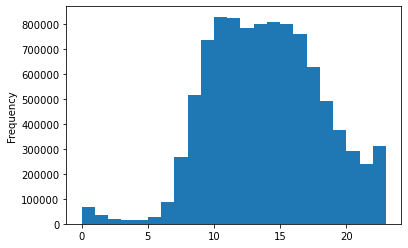

In [20]:
# create the histogram for df_1 data (task 3)

hist_1 = df_3['order_hour_of_day'].plot.hist(bins = 23)

#### Histogram shows that the most orders are placed between 9am and 5pm, and the peak is between 10am and 11am. The lowest numbers of items have been bought between 3am and 5am

In [21]:
hist_1.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'hist_1_order_hour_of_day.png'))

### 3.2 Expenditure by Hours of the Day (Line Chart)

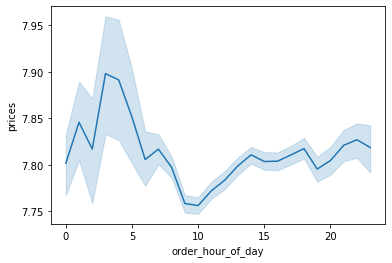

In [22]:
# create line chart to compare the 'prices' with 'the hour of the day' (task no 5)

line = sns.lineplot(data = df_3, x = 'order_hour_of_day',y = 'prices')

#### The most expensive items are bought in early hours; between 3am and 4am

### 3.3 Orders by Customer Loyalty Categories (Bar Chart)

In [23]:
# create the subset from small data frame with only user_id and order_number

df_4 = small[['user_id','order_number']]

In [24]:
df_4

,user_id,order_number
0,138,28
2,138,1
3,138,10
6,138,23
10,138,5
...,...,...
32434188,31628,5
32434191,136325,3
32434199,27382,8
32434204,56454,4


In [25]:
df_4.describe()

,user_id,order_number
count,9.729729e+06,9.729729e+06
mean,1.029238e+05,1.714131e+01
std,5.946358e+04,1.753525e+01
min,1.000000e+00,1.000000e+00
25%,5.141200e+04,5.000000e+00
50%,1.025900e+05,1.100000e+01
75%,1.543650e+05,2.400000e+01
max,2.062090e+05,9.900000e+01


In [26]:
df_4.shape

(9729729, 2)

In [27]:
df_4['order_number'].mean()

17.141313493931847

In [28]:
df_4['order_number'].median()

11.0

In [29]:
df_4['order_number'].min()

1

In [30]:
df_4['order_number'].max()

99

#### To create the 3 customers groups. The mean of "order_number" variant is 17.14. The customers who haved ordered more than 36 times per year / approximately 3 orders per month represent the loyal customer group. The new customers are those who have orderd 12 times or less, and the regular customers are those who have placed orders more than once a month (between 13 and 35 orders).

In [31]:
# establish flag criteria - create “max_order” column, group “user_id” column, generate maximum orders on “order_number”

df_4['max_order'] = df_4.groupby(['user_id'])['order_number'].transform(np.max)

<ipython-input-31-ada4ab8bafbc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4['max_order'] = df_4.groupby(['user_id'])['order_number'].transform(np.max)


In [32]:
# deriving columns with loc()

df_4.loc[df_4['max_order'] >= 36.00, 'loyalty_flag'] = 'Loyal customer'

C:\Users\senja\anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\senja\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [33]:
df_4.loc[(df_4['max_order'] < 36.00) & (df_4['max_order'] > 12.00), 'loyalty_flag'] = 'Regular customer'

C:\Users\senja\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [34]:
df_4.loc[df_4['max_order'] <= 12.00, 'loyalty_flag'] = 'New customer'

C:\Users\senja\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [35]:
df_4['loyalty_flag'].value_counts(dropna = False)

Regular customer    3750421
Loyal customer      3630245
New customer        2349063
Name: loyalty_flag, dtype: int64

In [36]:
# check the multiple columns

df_4[['user_id', 'loyalty_flag', 'order_number']].head(50)

,user_id,loyalty_flag,order_number
0,138,Regular customer,28
2,138,Regular customer,1
3,138,Regular customer,10
6,138,Regular customer,23
10,138,Regular customer,5
12,138,Regular customer,3
13,138,Regular customer,1
19,138,Regular customer,8
21,138,Regular customer,14
22,138,Regular customer,15


In [37]:
df_4.groupby('loyalty_flag').agg({'order_number': ['mean', 'min', 'max']})

order_number        
                         mean min max
loyalty_flag                         
Loyal customer      30.716908   1  99
New customer         4.310965   1  12
Regular customer    12.036969   1  35

In [38]:
# compare the loyalty_flag statistics with the main data frame cop_merged

merged_cop.groupby('loyalty_flag').agg({'order_number': ['mean', 'min', 'max']})

order_number        
                         mean min max
loyalty_flag                         
Loyal customer      32.639724   1  99
New customer         3.806988   1  10
Regular customer    12.347100   1  40

In [39]:
df_4['loyalty_flag'].value_counts()

Regular customer    3750421
Loyal customer      3630245
New customer        2349063
Name: loyalty_flag, dtype: int64

In [40]:
 # compare the loyalty groups frequencies with the main data frame merged_cop
    
merged_cop['loyalty_flag'].value_counts()

Regular customer    15891077
Loyal customer      10293737
New customer         6249398
Name: loyalty_flag, dtype: int64

<AxesSubplot:>

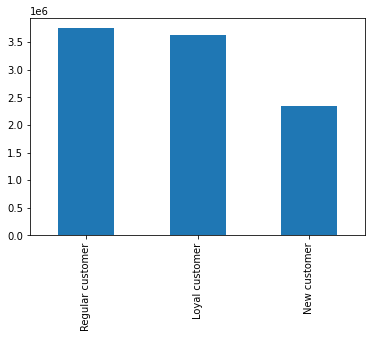

In [41]:
# create the bar chart for loyalty_flag - the sample data frame (task 4)

df_4['loyalty_flag'].value_counts().plot.bar()

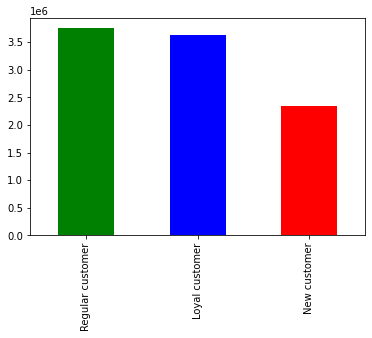

In [42]:
bar_1 = df_4['loyalty_flag'].value_counts().plot.bar(color = ['green','blue','red'])

In [43]:
bar_1.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_1_orders_loyalty.png'))

<AxesSubplot:>

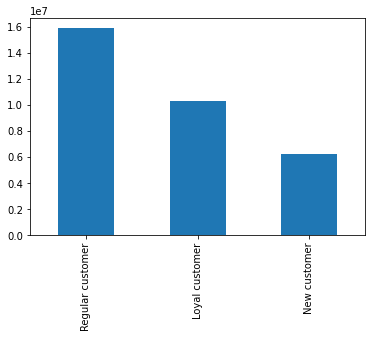

In [44]:
# create the bar chart for loyalty_flag - the main data frame (task 4)

merged_cop['loyalty_flag'].value_counts().plot.bar()

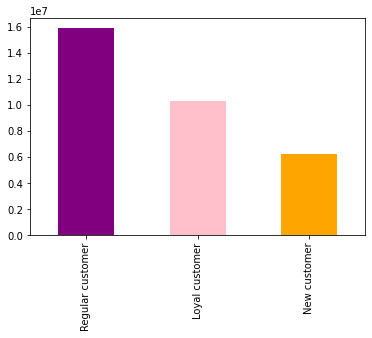

In [45]:
bar_2 = merged_cop['loyalty_flag'].value_counts().plot.bar(color = ['purple','pink','orange'])

In [46]:
bar_2.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_2_orders_loyalty.png'))

#### The bar chart shows the number of customers in each group; the regular customers are the biggest group as expected but the number of loyal customers are also high.

### 3.4 Links Between Age and Family Status and Dependants (Line Chart)

In [47]:
# create the subset from small data frame with the age, the marital status, the number of dependants and income

df_5 = small[['age','marital_status','no_dependants','income']]

In [48]:
df_5.head(20)

,age,marital_status,no_dependants,income
0,81,married,1,49620
2,81,married,1,49620
3,81,married,1,49620
6,81,married,1,49620
10,81,married,1,49620
12,81,married,1,49620
13,81,married,1,49620
19,81,married,1,49620
21,81,married,1,49620
22,81,married,1,49620


In [49]:
# performing multiple aggregations - means, max and min for the number of dependants based on the marital status

df_5.groupby('marital_status').agg({'no_dependants': ['mean', 'min', 'max']})

no_dependants        
                                          mean min max
marital_status                                        
divorced/widowed                      0.000000   0   0
living with parents and siblings      1.988932   1   3
married                               2.002886   1   3
single                                0.000000   0   0

In [50]:
# performing multiple aggregations - means, max and min for age based on the marital status

df_5.groupby('marital_status').agg({'age': ['mean', 'min', 'max']})

age        
                                       mean min max
marital_status                                     
divorced/widowed                  70.516406  60  81
living with parents and siblings  19.504714  18  21
married                           51.490205  22  81
single                            38.602440  18  59

In [51]:
df_5['no_dependants'].value_counts()

3    2442123
2    2430303
0    2429744
1    2427559
Name: no_dependants, dtype: int64

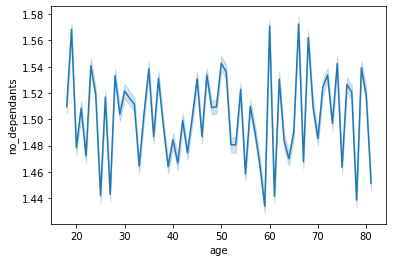

In [52]:
# create line chart for df_5; age and number of dependants (task 6)

line = sns.lineplot(data = df_5, x = 'age',y = 'no_dependants')

#### The line chart shows that the number of dependants vary between 1.43 and 1.57. There are variances on number of dependants in each age group. Based on this data the age does not provide any indication for the number of dependants. 

In [53]:
# grouping the dependant statical data for customers as per their marital status - sample data frame

df_5.groupby('marital_status').agg({'no_dependants': ['mean', 'min', 'max']})

no_dependants        
                                          mean min max
marital_status                                        
divorced/widowed                      0.000000   0   0
living with parents and siblings      1.988932   1   3
married                               2.002886   1   3
single                                0.000000   0   0

In [54]:
# checking the code for the main data frame

merged_cop.groupby('marital_status').agg({'no_dependants': ['mean', 'min', 'max']})

no_dependants        
                                          mean min max
marital_status                                        
divorced/widowed                      0.000000   0   0
living with parents and siblings      1.988648   1   3
married                               2.003145   1   3
single                                0.000000   0   0

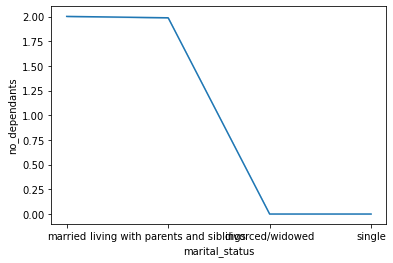

In [55]:
# create line chart for df_5 data; marital status and number of dependants (task 6)

line = sns.lineplot(data = df_5, x = 'marital_status',y = 'no_dependants')

#### The line chart shows that the number of dependants are approximately 2 for the customers who are married and for the group of "living with parents or siblings". As expected the customers who are single would not have many dependants but this data shows they they do not have any dependants. The data also shows that the customers who are widows or divorsed do not report any dependants either. This is likely due to ages of widows/divorsed being recorded as between 60 and 81. 

#### The data does not capture/record the divorsed / widowed customers who are younger than 60 or those customers who divorsed but have children or are married but do not have children.

### 3.5 Link Between Age and Spending Power (Scatterplot)

In [56]:
df_5.describe()

,age,no_dependants,income
count,9.729729e+06,9.729729e+06,9.729729e+06
mean,4.946742e+01,1.502049e+00,9.944751e+04
std,1.848453e+01,1.118676e+00,4.308724e+04
min,1.800000e+01,0.000000e+00,2.590300e+04
25%,3.300000e+01,1.000000e+00,6.698800e+04
50%,4.900000e+01,2.000000e+00,9.662600e+04
75%,6.500000e+01,3.000000e+00,1.279130e+05
max,8.100000e+01,3.000000e+00,5.939010e+05


In [57]:
# performing multiple aggregations - means, max and min for the number of income based on the age

df_5.groupby('age').agg({'income': ['mean', 'min', 'max']})

income               
              mean    min     max
age                              
18    70458.635982  26067  357226
19    69733.829639  25972  396364
20    70834.116566  26024  338939
21    70624.873390  25937  372571
22    69883.252811  26070  369192
..             ...    ...     ...
77   116609.437522  30031  512331
78   117204.908276  29113  381735
79   115346.697290  29330  579169
80   114453.750095  29045  569253
81   114994.586891  29738  571932

[64 rows x 3 columns]

In [58]:
pd.options.display.max_rows = None

In [59]:
df_5.groupby('age').agg({'income': ['mean', 'min', 'max']})

income               
              mean    min     max
age                              
18    70458.635982  26067  357226
19    69733.829639  25972  396364
20    70834.116566  26024  338939
21    70624.873390  25937  372571
22    69883.252811  26070  369192
23    70690.344181  26146  381379
24    71968.470145  26072  391834
25    71057.662844  26137  385324
26    70503.690889  26045  371450
27    70577.844934  25979  378234
28    69493.587176  26580  376208
29    70291.792588  26013  392552
30    69550.556771  25991  381351
31    70181.736551  26039  391967
32    70140.496175  25955  367501
33    70672.022216  26061  395178
34    70840.763381  25911  387860
35    71294.498932  25999  388874
36    71061.068167  26170  351375
37    70256.146378  25986  397929
38    69850.708899  26234  390410
39    70818.458076  25903  382018
40    70961.191282  26154  395360
41   116622.744301  29017  551849
42   116693.283460  29081  549286
43   116887.471502  29463  592409
44   114931.999781  29076  567729
45   117602.700280  29082  569810
46   115537.994367  29053  550917
47   115337.938838  29044  584097
48   117299.543708  29663  536156
49   116857.377644  29112  559700
50   116122.948850  29085  574425
51   114938.633864  29085  528184
52   114378.111511  29257  526894
53   114702.702007  29419  518856
54   115039.317155  29415  531126
55   113056.296164  29018  591089
56   117000.579404  29149  525892
57   115959.894213  29053  579397
58   115779.166537  29075  462969
59   114449.761779  29161  573617
60   115328.459535  29192  578251
61   116022.578741  29066  441855
62   115245.359703  29057  552776
63   116971.723896  29003  545128
64   116590.610142  29134  573849
65   116750.180767  29005  577728
66   114939.078731  29050  350982
67   115180.614232  29189  443761
68   115881.920830  29011  540239
69   115893.159350  29298  515905
70   113502.567687  29001  456192
71   114672.663619  29327  558033
72   117291.892627  30101  556641
73   114961.224139  29318  421524
74   114855.149407  29230  497926
75   117902.393422  29040  593901
76   114985.545722  29302  578551
77   116609.437522  30031  512331
78   117204.908276  29113  381735
79   115346.697290  29330  579169
80   114453.750095  29045  569253
81   114994.586891  29738  571932

In [60]:
# performing multiple aggregations - means, max and min for income based on the marital status

df_5.groupby('marital_status').agg({'income': ['mean', 'min', 'max']})

income               
                                           mean    min     max
marital_status                                                
divorced/widowed                  115707.518050  29005  578251
living with parents and siblings   70702.144974  25937  396364
married                           101323.563070  25911  593901
single                             91346.586379  25903  584097

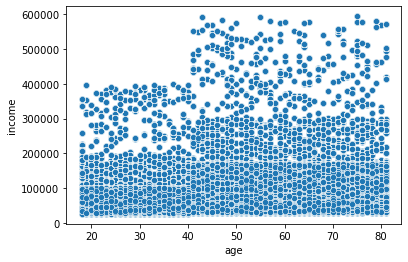

In [61]:
sns_1 = sns.scatterplot(x = 'age', y = 'income',data = df_5)

In [62]:
sns_1.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'sns_1_income_age.png'))

#### The scatterplot shows; 
#### * The customers who are 41 - 81 years olds have the highest buying power as some of these customers have annual income between 400K and 593K. The customers on their 40s or under do not seem to be earning 400K or more or their income data is not recorded. 
#### * There are approximately the same number of customers with income of 300-390K in each age group but significantly more customers in their 40s or over whose income is between 200K and 300K than the customers under 40s who have the same income.
#### * There are roughly the same number of people with annual income of 100K or less in each age group but there are more customers who are in their 40s and over and earn 100-180K yearly than customers who are under 40s.
#### * The summary; As expected the higher the age, the more earning power the person generally has. There are high number of customers who are 40 and under and whose annual income is no more than 200K and fewer customers who are under 40 and earn more than 200K. Another interesting finding is that the retirement age (65s and over) do not generally reduce the income rate as one could have expected.

### 4. Exporting Data


In [64]:
df_5.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'final_sample.pkl'))